<div style="border: 3px solid #00ffcc; padding: 15px; background-color: black; font-size: 40px; color: #00ffcc; font-family: 'Courier New', monospace; text-shadow: 0 0 3px #00ffcc, 0 0 8px #00ffcc;">
<b>MAUNA LOA WEEKLY ATMOSPHERIC CO2</b>
</div>


### SÉRIES TEMPORAIS - 2025.1 ---  Aluno: Kennyo W.E. Cavalcante

<div style="border: 6px solid #00ffcc; padding: 20px; font-size: 25px; color: #FFFFFF; font-family: 'Lucida Sans Unicode' ">
<b>1 - INTRODUÇÃO</b>
</div>

<div style="text-align: justify;">

O Observatório de Mauna Loa (MLO) está localizado na encosta norte do vulcão Mauna Loa, na Ilha Grande do Havaí, a uma altitude de 3.397 metros. O observatório é uma das cinco principais instalações de pesquisa atmosférica do Laboratório Global de Monitoramento (GML) e vem monitorando e coletando dados relacionados às mudanças atmosféricas de forma contínua desde a década de 1950.

O observatório se projeta através da forte camada de inversão de temperatura marinha presente na região, a qual separa as porções mais poluídas da atmosfera inferior da troposfera livre, que é muito mais limpa. O ar não perturbado, a localização remota e as influências mínimas da vegetação e da atividade humana fazem do MLO um local ideal para o monitoramento de componentes atmosféricos que podem causar mudanças climáticas.

O MLO tem apoiado centenas de programas de pesquisa cooperativa com universidades e organizações governamentais nacionais e internacionais. Uma equipe de 8 pessoas opera e mantém o observatório, com escritórios em Hilo, Havaí.

Como integrante da GML, tem como missão  adquirir, avaliar e disponibilizar registros precisos e de longo prazo de gases atmosféricos, partículas de aerossóis, nuvens e radiação na superfície, de forma que seja possível compreender as causas e consequências das mudanças climáticas.

</div>


<hr style="border: 2px solid yellow;">

### Portanto, a análise em estudo diz respeito às concentrações médias de CO2 atmosférico (em partes por milhão em volume — ppm) a partir de amostras de ar contínuas coletadas no Observatório de Mauna Loa, Havaí, EUA no período entre março de 1958 – dezembro de 2001.

<hr style="border: 2px solid yellow;">

<div style="display: flex; justify-content: center;">
  <img src="mlo.jpg" alt="Imagem 1" width="500"/>
  <img src="mlo2.jpg" alt="Imagem 2" width="500"/>
  <img src="mlo3.png" alt="Imagem 2" width="500"/>
</div>



<div style="border: 3px solid #00ffcc; padding: 20px; font-size: 25px; color: #FFFFFF; font-family: 'Lucida Sans Unicode' ">
<b>1.1 - METODOLOGIA</b>
</div>


<div style ="text-align: justify;">
    Um analisador de gás infravermelho não dispersivo da Applied Physics Corporation (APC) foi utilizado para obter as concentrações atmosféricas de CO₂, com base em dados contínuos (quatro medições por hora) coletados por meio de linhas de entrada no topo de várias torres. São exigidos períodos estáveis de dados de pelo menos seis horas por dia; se em determinado dia não houver nenhum período de seis horas disponível, então nenhum dado é utilizado para aquele dia. Médias semanais foram calculadas para a maioria das semanas ao longo dos aproximadamente 44 anos de registro. Os dados contínuos do ano 2000 são comparados com os dados de frascos coletados no mesmo local na seção de gráficos.  
</div>  
  
Links:
 - https://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpr_co2.html
 - https://gml.noaa.gov/obop/mlo/
        

<div style="border: 3px solid #00ffcc; padding: 20px; font-size: 25px; color: #FFFFFF; font-family: 'Lucida Sans Unicode' ">
<b>1.2 - BIBLIOTECAS</b>
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
import seaborn as sns
from pmdarima import auto_arima

In [3]:
# Para Plotagem
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

<div style="border: 3px solid #00ffcc; padding: 20px; font-size: 25px; color: #FFFFFF; font-family: 'Lucida Sans Unicode' ">
<b>2 - DESCRIÇÃO DO DATASET</b>
</div>

In [5]:
#Importando Dataset CO2
co2_df = sm.datasets.co2.load_pandas().data
co2_df = co2_df.dropna()

print(f'Tamanho do dataset: {co2_df.shape}')
print("Primeiro índice:", co2_df.index[0])
print("Último índice:", co2_df.index[-1])
co2_df.head(5)

Tamanho do dataset: (2225, 1)
Primeiro índice: 1958-03-29 00:00:00
Último índice: 2001-12-29 00:00:00


,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4


In [7]:
# Agregação para dados mensais (média)
co2_mensal = co2_df['co2'].resample('ME').mean()
co2_mensal = co2_mensal.dropna()
co2_mensal

1958-03-31    316.100000
1958-04-30    317.200000
1958-05-31    317.433333
1958-07-31    315.625000
1958-08-31    314.950000
                 ...    
2001-08-31    369.425000
2001-09-30    367.880000
2001-10-31    368.050000
2001-11-30    369.375000
2001-12-31    371.020000
Name: co2, Length: 521, dtype: float64

<div style="border: 3px solid #00ffcc; padding: 20px; font-size: 25px; color: #FFFFFF; font-family: 'Lucida Sans Unicode' ">
<b>3 - ANÁLISE EXPLORATÓRIA</b>
</div>

In [10]:
#Conversão em Série (índice como o próprio índice do dataset)
serie = pd.Series(co2_mensal.values, index=pd.to_datetime(co2_mensal.index))

# Reconstrução índice mensal
serie.index = pd.date_range(start=serie.index[0], periods=len(serie), freq='M')

#serie = serie.asfreq('W')  # Define frequência semanal (por exemplo)

serie = serie.fillna(method='ffill')  # Preencher valores ausentes
serie.head()


C:\Users\kenny\AppData\Local\Temp\ipykernel_336\2753860515.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  serie.index = pd.date_range(start=serie.index[0], periods=len(serie), freq='M')
C:\Users\kenny\AppData\Local\Temp\ipykernel_336\2753860515.py:9: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  serie = serie.fillna(method='ffill')  # Preencher valores ausentes


1958-03-31    316.100000
1958-04-30    317.200000
1958-05-31    317.433333
1958-06-30    315.625000
1958-07-31    314.950000
Freq: ME, dtype: float64

In [12]:
type(serie)

pandas.core.series.Series

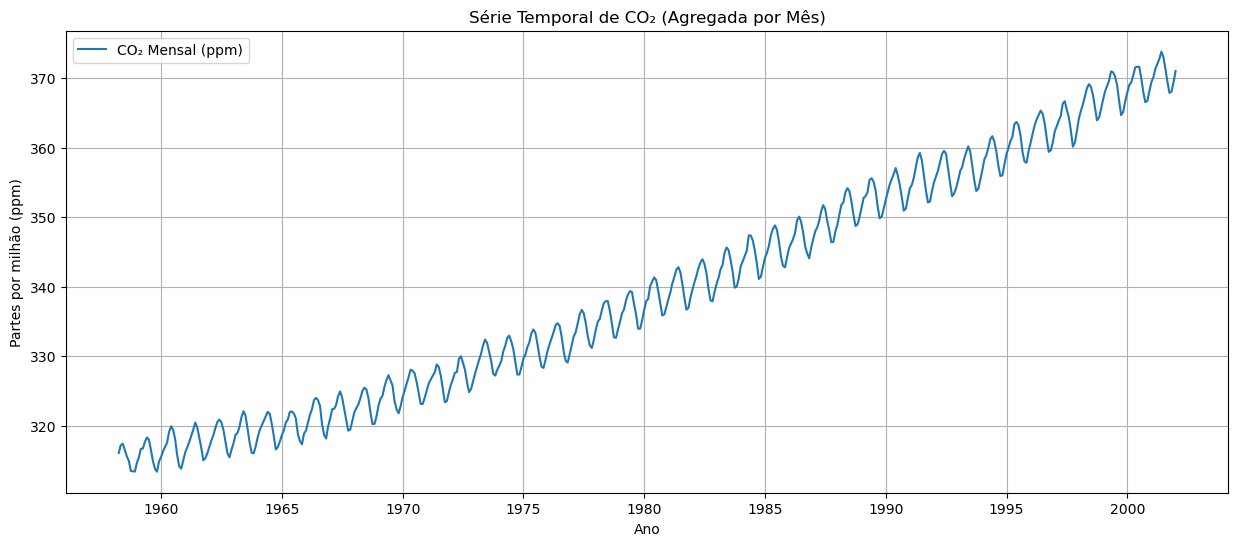

In [14]:
# --- Visualização da série mensal ---
plt.plot(co2_mensal, label='CO₂ Mensal (ppm)', color='tab:blue')
plt.title("Série Temporal de CO₂ (Agregada por Mês)")
plt.ylabel("Partes por milhão (ppm)")
plt.xlabel("Ano")
plt.legend()
plt.grid(True)
plt.show()

In [16]:
#Analisar valores faltantes
co2_mensal.isnull().sum()

0

In [18]:
#Decomposição:
from statsmodels.tsa.seasonal import seasonal_decompose

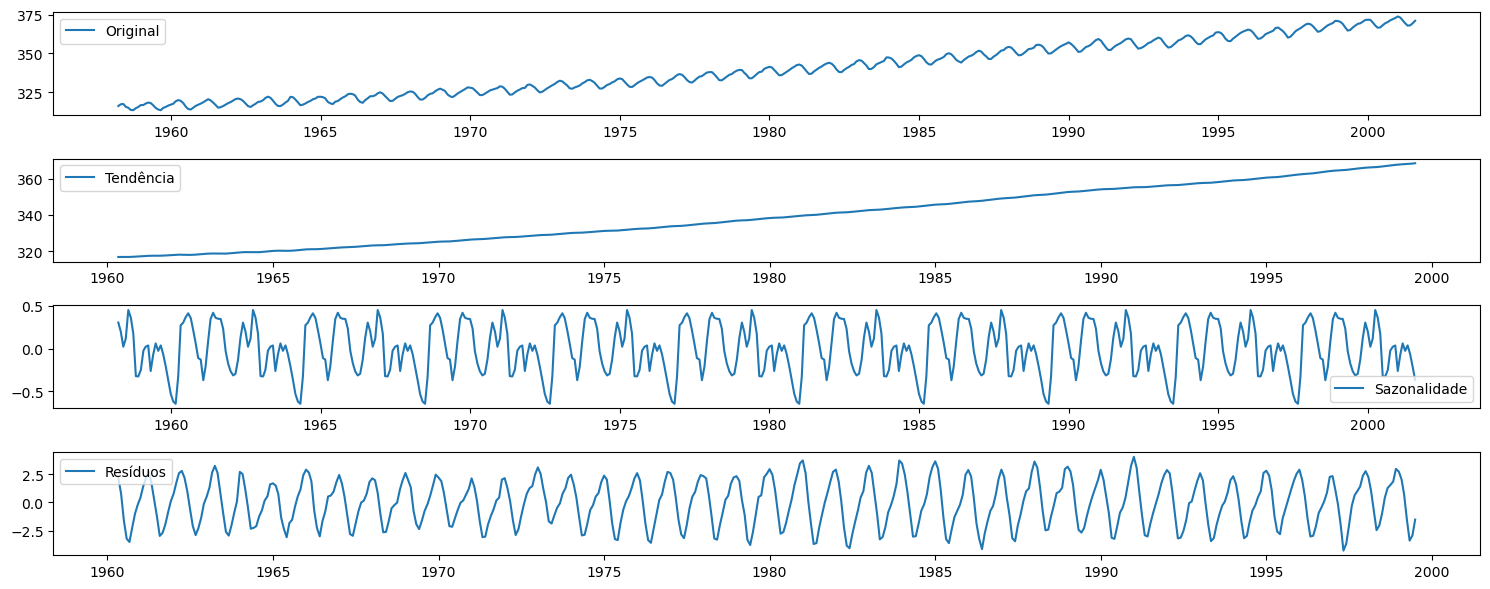

In [20]:
decomposicao = seasonal_decompose(serie, period=50)
#fig = decomposicao.plot() 

plt.subplot(411)
plt.plot(serie, label = 'Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(decomposicao.trend, label = 'Tendência')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(decomposicao.seasonal, label = 'Sazonalidade')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(decomposicao.resid, label = 'Resíduos')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

<div style="border: 3px solid #00ffcc; padding: 20px; font-size: 25px; color: #FFFFFF; font-family: 'Lucida Sans Unicode' ">
<b>4 - VERIFICAÇÃO DA ESTACIONARIDADE</b>
</div>

A estacionariedade no teste de estacionariedade é uma propriedade das séries temporais que afirma que o valor da variável não muda com o tempo, ou seja, a variação no tempo não serve como um fator que traz mudanças no valor de uma variável. 

Verificar se a série possui média, variância e autocovariância constantes.

Critérios:
 - 𝐻0: Hipótese Nula. É não estacionária
 - H1: Hipótese Alternativa. É estacionária
 - Se o p-valor > 0.05: Não rejeita H₀ → Série não estacionária
 - Se o p-valor ≤ 0.05: Rejeita H₀ → Série estacionária

In [28]:
from statsmodels.tsa.stattools import adfuller

resultado_adf = adfuller(serie)

print("Estatística ADF:", resultado_adf[0])
print("p-valor:", resultado_adf[1])
print("Nº de lags usados:", resultado_adf[2])
print("Nº de observações:", resultado_adf[3])
print("Valores críticos:")

for chave, valor in resultado_adf[4].items():
    print(f"   {chave} : {valor}")


#Portanto, a série é não estacionária: tem propriedades estatísticas 
#que variam ao longo do tempo, o que pode levar a análises
#enganosas ou modelos falhos se não for tratada adequadamente. 

Estatística ADF: 3.3638624634993497
p-valor: 1.0
Nº de lags usados: 12
Nº de observações: 508
Valores críticos:
   1% : -3.44328828958775
   5% : -2.8672462791357867
   10% : -2.569809231353463


### Resultado do Teste de Estacionariedade (ADF)

A estatística ADF foi de aproximadamente **3.364**, com **p-valor de 0.962**, muito acima do nível de significância usual de 5%.  
Isso indica que **não rejeitamos a hipótese nula de raiz unitária**, ou seja, a série **não é estacionária**.
 - Modelos podem capturar tendência ou sazonalidade em vez de estrutura real dos dados
 - As previsões podem ser enviesadas ou inconsistentes.
 - A análise de resíduos e validação do modelo se torna inadequada.

<div style="border: 3px solid #00ffcc; padding: 20px; font-size: 25px; color: #FFFFFF; font-family: 'Lucida Sans Unicode' ">
<b>5 - IDENTIFICAÇÃO AUTOMÁTICA - AutoARIMA</b>
</div>

In [32]:
# Ajuste do modelo AutoARIMA
modelo_auto = auto_arima(
    serie,
    seasonal=True,           # Não Detecta sazonalidade automaticamente
    m=12,                    # Sazonalidade mensal
    trace=True,              # Mostra os modelos testados
    error_action='ignore',   # Ignora erros de modelos inválidos
    suppress_warnings=True,  # Silencia warnings
    stepwise=True            # Usa método rápido de busca
)


# Sumário
print(modelo_auto.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=647.540, Time=3.11 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1665.817, Time=0.05 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=inf, Time=0.76 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1152.160, Time=0.51 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1667.856, Time=0.07 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=839.275, Time=2.01 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=717.121, Time=2.36 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=648.355, Time=7.42 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=648.396, Time=6.64 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=996.002, Time=0.41 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=782.608, Time=6.44 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=659.710, Time=7.02 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=660.653, Time=7.29 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=684.793, Time=1.93 sec
 ARIMA(2,1,1)(1,0,1)[12] intercept

Embora apresente bom desempenho geral, nem todos os coeficientes são estatisticamente significativos.

Os resíduos são não autocorrelacionados (Ljung-Box), o que é desejável. No entanto, há sinais de heterocedasticidade (variância não constante) e violação da normalidade (teste de Jarque-Bera).

**Apesar dessas limitações, o modelo é adequado para previsão, já que os resíduos são independentes**

<div style="border: 3px solid #00ffcc; padding: 20px; font-size: 25px; color: #FFFFFF; font-family: 'Lucida Sans Unicode' ">
<b>6- AJUSTE DO MODELO E DIAGNÓSTICO</b>
</div>

<div style="border: 3px solid #00ffcc; padding: 20px; font-size: 25px; color: #FFFFFF; font-family: 'Lucida Sans Unicode' ">
<b>6.1 - INDEPENDÊNCIA DE RESÍDUOS</b>
</div>

<Figure size 1000x400 with 0 Axes>

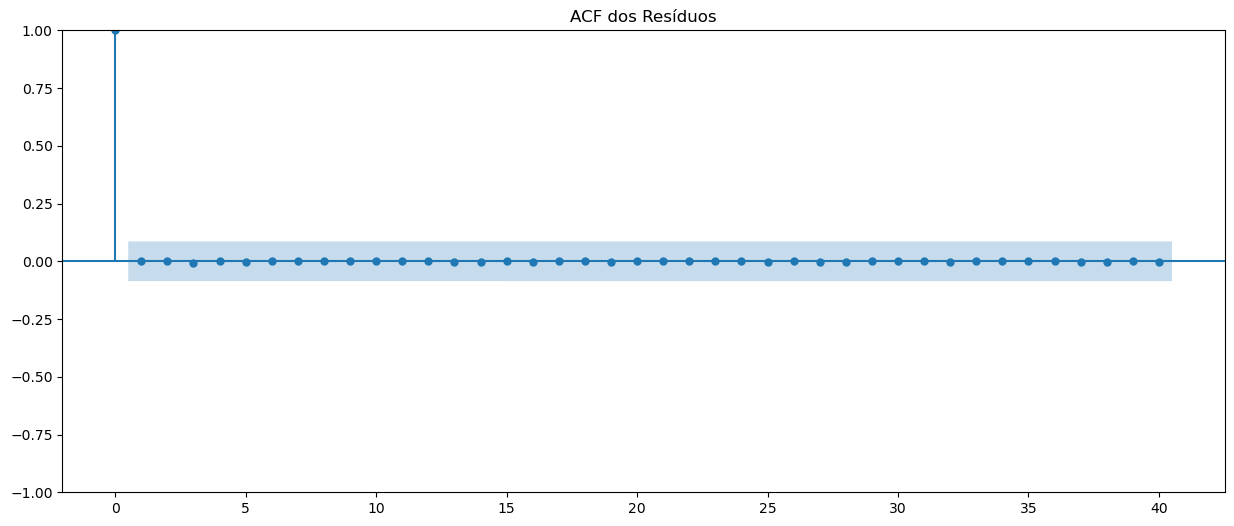

Teste de Ljung-Box:
     lb_stat  lb_pvalue
10  0.038246        1.0
20  0.071277        1.0
30  0.085427        1.0


In [34]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox

# Resíduos do modelo
residuos = modelo_auto.resid()

# Plot da ACF
plt.figure(figsize=(10, 4))
plot_acf(residuos, lags=40)
plt.title("ACF dos Resíduos")
plt.show()

# Teste de Ljung-Box:  é mais apropriado, porque verifica a presença de autocorrelação nos resíduos em múltiplas defasagens (lags). x Durbin Watson
ljung = acorr_ljungbox(residuos, lags=[10, 20, 30], return_df=True)
print("Teste de Ljung-Box:")
print(ljung)


<div style="border: 3px solid #00ffcc; padding: 20px; font-size: 25px; color: #FFFFFF; font-family: 'Lucida Sans Unicode' ">
<b>6.2 - ESTACIONARIEDADE DOS RESÍDUOS</b>
</div>

In [39]:
from statsmodels.tsa.stattools import adfuller

resultado_adf_resid = adfuller(residuos)

print("Estatística ADF dos resíduos:", resultado_adf_resid[0])
print("p-valor:", resultado_adf_resid[1])
print("Nº de lags usados:", resultado_adf_resid[2])
print("Nº de observações:", resultado_adf_resid[3])
print("Valores críticos:")

for chave, valor in resultado_adf_resid[4].items():
    print(f"   {chave} : {valor}")

Estatística ADF dos resíduos: -5.608395646877502
p-valor: 1.2192665110807117e-06
Nº de lags usados: 18
Nº de observações: 502
Valores críticos:
   1% : -3.4434437319767452
   5% : -2.8673146875484368
   10% : -2.569845688481135


<div style="border: 3px solid #00ffcc; padding: 20px; font-size: 25px; color: #FFFFFF; font-family: 'Lucida Sans Unicode' ">
<b>6.3 - NORMALIDADE DOS RESÍDUOS</b>
</div>

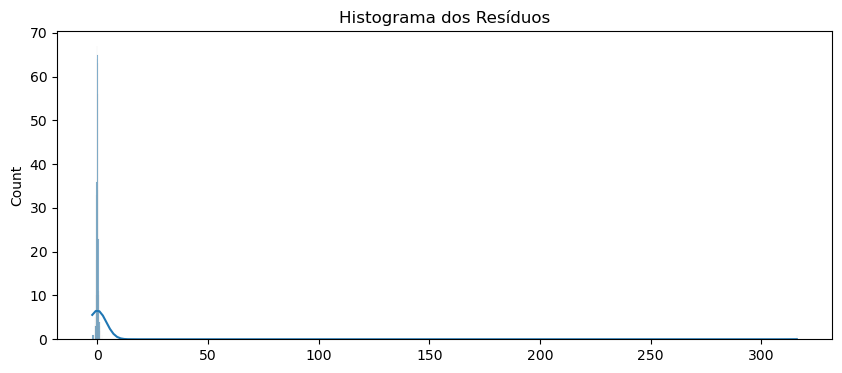

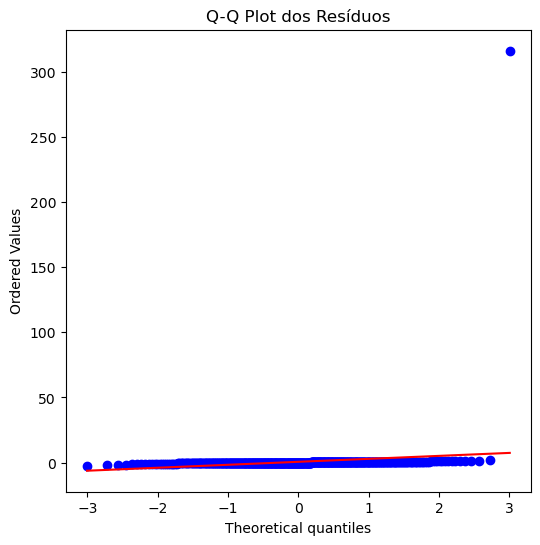

Shapiro-Wilk - Estatística: 0.03034977562523411 | p-valor: 5.31630742589857e-45


In [72]:

from scipy.stats import shapiro, probplot

# Histograma com KDE
plt.figure(figsize=(10, 4))
sns.histplot(residuos, kde=True)
#sns.histplot(residuos[1:], kde=True)
plt.title("Histograma dos Resíduos")
plt.show()
print(' ')
# Q-Q plot
plt.figure(figsize=(6, 6))
probplot(residuos, dist="norm", plot=plt)
#probplot(residuos[1:], dist="norm", plot=plt)
plt.title("Q-Q Plot dos Resíduos")
plt.show()

# Teste de Shapiro-Wilk
stat, p_shapiro = shapiro(residuos)
print("Shapiro-Wilk - Estatística:", stat, "| p-valor:", p_shapiro)


A normalidade dos resíduos foi avaliada pelo teste de Shapiro-Wilk, obtendo-se uma estatística de 0,036 e um p-valor de 6,38 × 10⁻⁴⁵.
Como o p-valor é extremamente baixo, rejeitamos com alta confiança a hipótese de normalidade.
Assim, os resíduos do modelo não seguem uma distribuição normal, o que confirma os resultados obtidos anteriormente pelo teste de Jarque-Bera

### Observa-se a presença de um possível outlier no primeiro valor dos resíduos. Embora esse ponto afete visualmente os gráficos, os testes estatísticos permaneceram dentro dos limites esperados, indicando que o modelo continua adequado

<div style="border: 3px solid #00ffcc; padding: 20px; font-size: 25px; color: #FFFFFF; font-family: 'Lucida Sans Unicode' ">
<b>6.4 - HOMOCEDASTICIDADE</b>
</div>

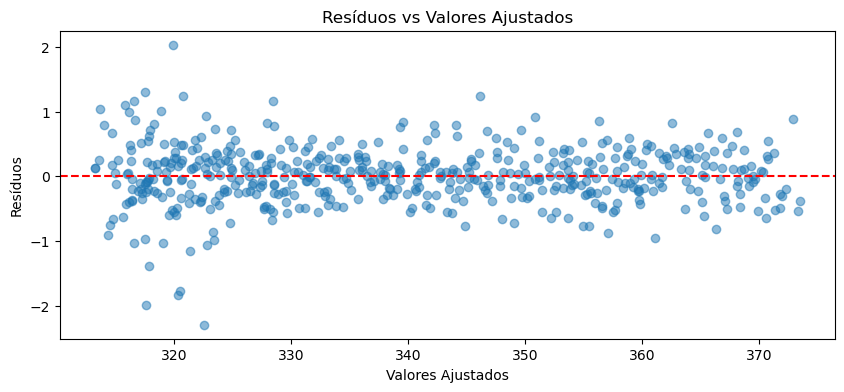

In [74]:
# Valores ajustados
#valores_ajustados = serie - residuos
valores_ajustados = serie - residuos[1:]


# Scatter plot resíduos vs ajustados
plt.figure(figsize=(10, 4))
plt.scatter(valores_ajustados, residuos, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Valores Ajustados")
plt.ylabel("Resíduos")
plt.title("Resíduos vs Valores Ajustados")
plt.show()

<div style="border: 3px solid #00ffcc; padding: 20px; font-size: 25px; color: #FFFFFF; font-family: 'Lucida Sans Unicode' ">
<b>6.5 - DETECÇÃO DE OUTLIERS</b>
</div>

In [47]:
from scipy.stats import zscore
import numpy as np

z_scores = np.abs(zscore(residuos))
outliers = np.where(z_scores > 3)[0]

print(f"Número de possíveis outliers (Z > 3): {len(outliers)}")
print("Índices dos outliers:", outliers)

Número de possíveis outliers (Z > 3): 1
Índices dos outliers: [0]


## AUTOCORRELAÇÕES
<hr style="border: 2px solid #00ffff;">

<div style="border: 3px solid #00ffcc; padding: 20px; font-size: 25px; color: #FFFFFF; font-family: 'Lucida Sans Unicode' ">
<b>7 - PREVISÕES COM O MODELO AJUSTADO</b>
</div>

In [51]:
n_periodos = 288 # até 2023
previsao, intervalo_conf = modelo_auto.predict(n_periods=n_periodos, return_conf_int=True)

# Criar índice de datas futuras (mensal)
indice_futuro = pd.date_range(start=serie.index[-1] + pd.DateOffset(months=1), periods=n_periodos, freq='M')

df_previsao = pd.DataFrame({
    "Previsao": previsao,
    "Inferior": intervalo_conf[:, 0],
    "Superior": intervalo_conf[:, 1]
}, index=indice_futuro)

print(df_previsao["Previsao"].isna().sum())  # Deve retornar 0

0


C:\Users\kenny\AppData\Local\Temp\ipykernel_336\532907828.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  indice_futuro = pd.date_range(start=serie.index[-1] + pd.DateOffset(months=1), periods=n_periodos, freq='M')


In [53]:
print("Frequência detectada:", serie.index.freq)
print("Exemplo do índice:", serie.index[:5])

Frequência detectada: <MonthEnd>
Exemplo do índice: DatetimeIndex(['1958-03-31', '1958-04-30', '1958-05-31', '1958-06-30',
               '1958-07-31'],
              dtype='datetime64[ns]', freq='ME')


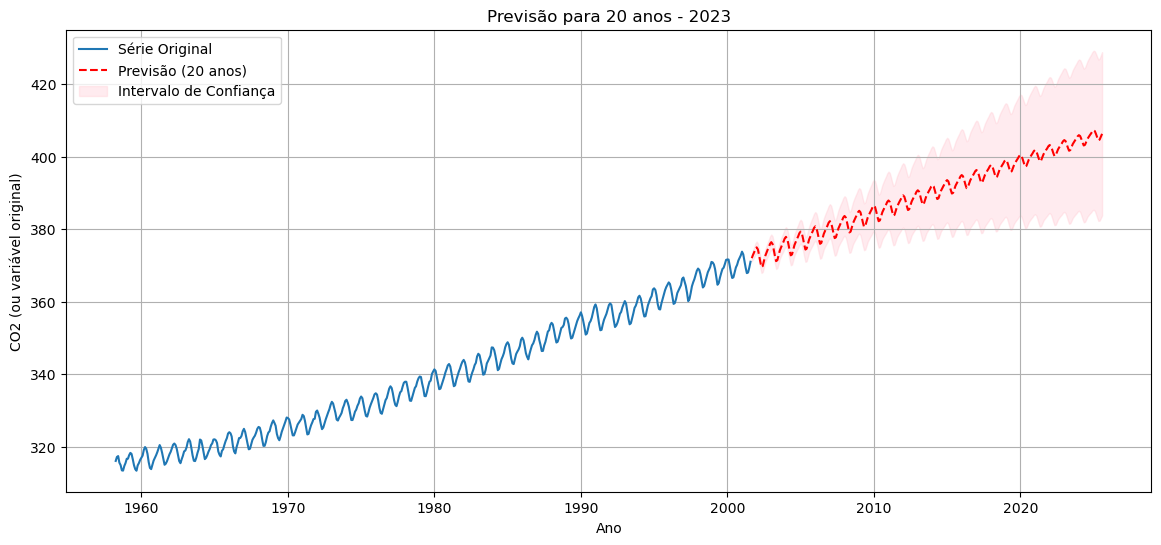

In [55]:
#Gráfico de Previsão

plt.figure(figsize=(14,6))
plt.plot(serie, label="Série Original")
plt.plot(df_previsao["Previsao"], label="Previsão (20 anos)", color="red", linestyle="--")
plt.fill_between(df_previsao.index, df_previsao["Inferior"], df_previsao["Superior"], color="pink", alpha=0.3, label="Intervalo de Confiança")
plt.title("Previsão para 20 anos - 2023")
plt.xlabel("Ano")
plt.ylabel("CO2 (ou variável original)")
plt.legend()
plt.grid(True)
plt.show()


In [57]:
ultimo_valor_previsto = df_previsao["Previsao"].iloc[-1]
print(f"Valor previsto para o mês final (20 anos à frente): {ultimo_valor_previsto:.2f}")


Valor previsto para o mês final (20 anos à frente): 406.29


In [59]:
import pandas as pd

# Caminho para o arquivo
caminho = "maunaloa2.txt"

# Lê o arquivo separando por espaços
df_txt = pd.read_csv(
    caminho,
    sep="\s+",               # separação por espaço(s)
    header=None,             # sem cabeçalho
    names=["Sigla", "Ano", "Mes", "CO2"]  # nomeia as colunas
)

# Substitui vírgula por ponto e converte para float
df_txt["CO2"] = df_txt["CO2"].str.replace(",", ".", regex=False).astype(float)

# Cria coluna de datas (opção 1: fim do mês)
df_txt["Data"] = pd.to_datetime(dict(year=df_txt["Ano"], month=df_txt["Mes"], day=1)) + pd.offsets.MonthEnd(0)

# Define índice como a data
serie_co2 = df_txt.set_index("Data")["CO2"]

# Agora, 'serie_co2' é uma série temporal mensal
print(serie_co2.head())
print(serie_co2.index.freq)  # Verifica se a frequência foi inferida corretamente

Data
1969-08-31    322.51
1969-09-30    321.36
1969-10-31    320.74
1969-11-30    321.98
1969-12-31    323.78
Name: CO2, dtype: float64
None


<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
C:\Users\kenny\AppData\Local\Temp\ipykernel_336\2011367695.py:9: SyntaxWarning: invalid escape sequence '\s'
  sep="\s+",               # separação por espaço(s)


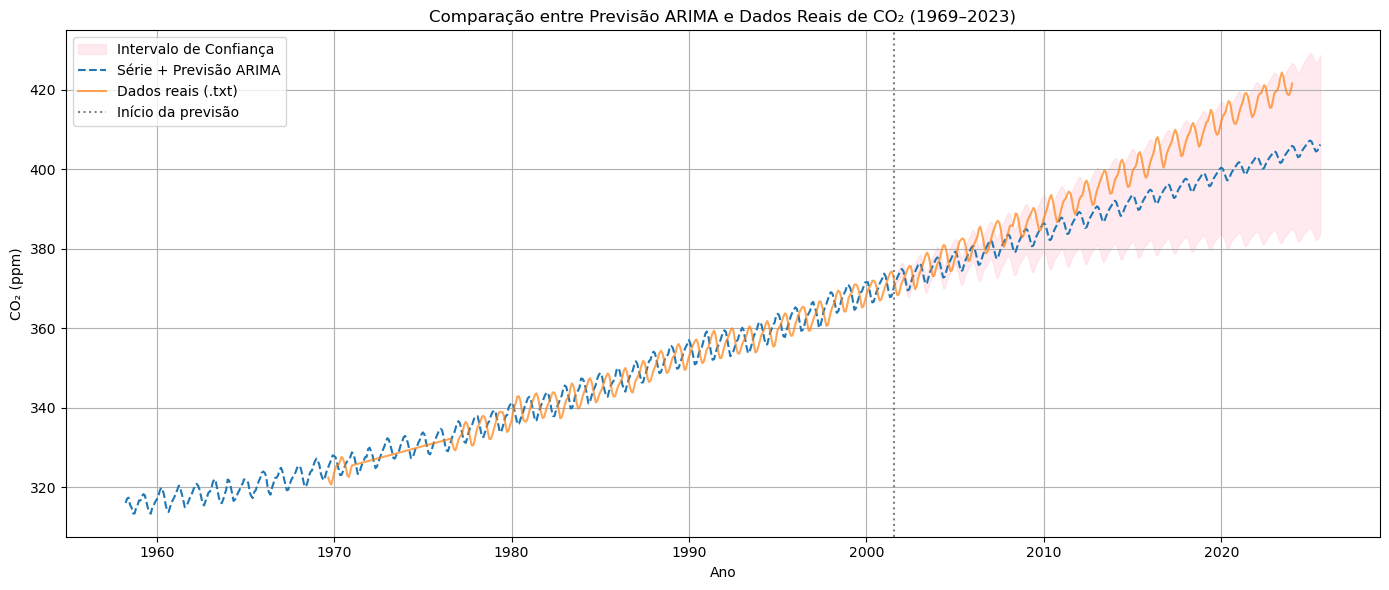

In [61]:
import matplotlib.pyplot as plt

# Junta série original + previsão
serie_completa_prevista = pd.concat([serie, df_previsao["Previsao"]])

# Garante alinhamento por data (caso datas exatas não coincidam)
plt.figure(figsize=(14, 6))
plt.fill_between(df_previsao.index, df_previsao["Inferior"], df_previsao["Superior"], color="pink", alpha=0.3, label="Intervalo de Confiança")
plt.plot(serie_completa_prevista, label="Série + Previsão ARIMA", linestyle='--')
plt.plot(serie_co2, label="Dados reais (.txt)", alpha=0.7)

# Linha de separação entre série original e previsão
plt.axvline(x=serie.index[-1], color='gray', linestyle=':', label="Início da previsão")

# Detalhes do gráfico
plt.title("Comparação entre Previsão ARIMA e Dados Reais de CO₂ (1969–2023)")
plt.xlabel("Ano")
plt.ylabel("CO₂ (ppm)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


pdf